In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [82]:
num_data = 3000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1) # 정규분포가 1인 noise 생성
x = init.uniform_(torch.Tensor(num_data, 1), -20, 20)   # num_data 만큼 특징을 1개 가지고 있는 데이터를 만들겠다는 것을 의미
y = (x**3) + 3
y_noise = y + noise

In [89]:
# 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트
# Sequential에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리

# 아래 코드는 특성의 개수가 1 -> 10 -> 20 -> 20 -> 10 -> 1개로 변하는 인공신경망
# 은닉층이 3개인 인공신경망 구성
# 또한 선형변환 이후 활성화 함수를 넣어 비선형이 생기도록.
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.00009)

In [90]:
loss_array = []
for i in range(num_epoch):  # 미니배치 설정하지 않음.
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.detach().numpy())

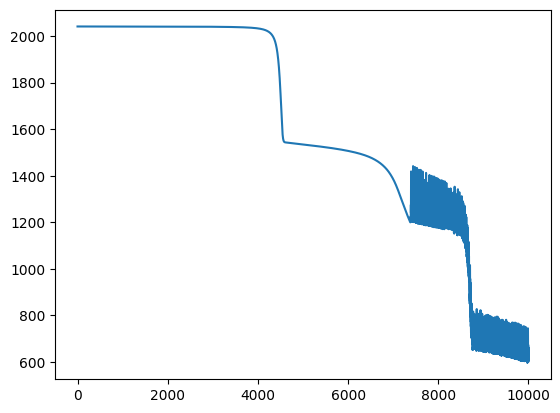

In [91]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

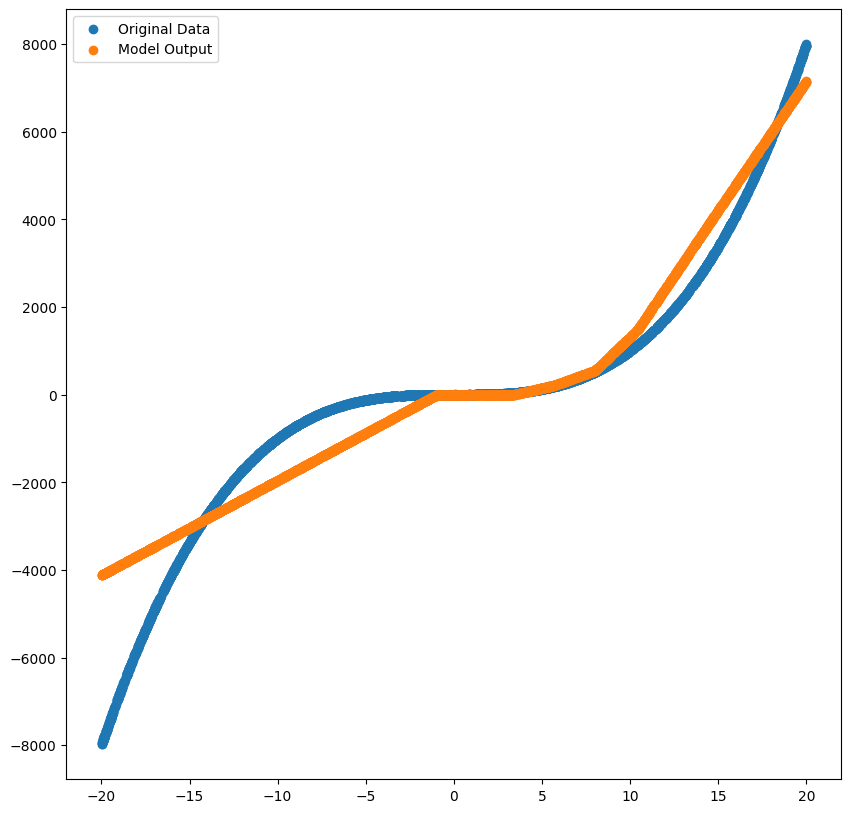

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(), y_noise, label="Original Data")
plt.scatter(x.detach().numpy(), output.detach().numpy(), label="Model Output")
plt.legend()
plt.show()